# Testing MACE's robustness

In [52]:

import matplotlib           as mpl
import matplotlib.pyplot    as plt
import numpy               as np
import matplotlib.lines     as mlines

from matplotlib          import rcParams, rc
rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'font.size': 10})
rc('font', family='serif')
rc('text', usetex=True)

from pathlib import Path
import sys

parentpath = str(Path().cwd())[:-16]

sys.path.append(parentpath)

import src.mace.test            as test
import src.mace.load            as load
import src.mace.utils            as utils


dt_fracts = {4 : 0.296, 5: 0.269,8: 0.221,10: 0.175,12: 0.146,16: 0.117,20: 0.09,25: 0.078,32: 0.062,48: 0.043,64: 0.033,128: 0.017}

%reload_ext autoreload
%autoreload 2

## Models

In [31]:
outloc  = '/STER/silkem/MACE/models/CSE_0D/'
test1 = '20240605_165012'
test2 = '20240605_165111'
test3 = '20240605_165130'
test4 = '20240605_165146'
test5 = '20240605_165203'
test6 = '20240605_165309'
test7 = '20240605_165905'
test8 = '20240605_170018'
test9 = '20240605_170030'
test10 = '20240605_170046'

tests = [test1, test2, test3, test4, test5, test6, test7, test8, test9, test10]

### Predicting & saving

In [32]:
testpath = 'mid_dens'

  # test_path = test10
for test_path in tests:
  
    print('__________ '+test_path+ ' _____________')
    print()

    trained = load.Trained_MACE(outloc=outloc, dirname=test_path, epoch=7)
    meta = trained.get_meta()
    model = trained.model

    savepath = outloc + test_path + '/results/' 

    err_test, err_evol, step_time, evol_time, n, n_hat, n_evol = test.test_model(model,testpath, meta, plotting=False, save = False, inpackage = True)
    utils.makeOutputDir(savepath)
    np.save(savepath+'n.npy', n)
    np.save(savepath+'n_hat.npy', n_hat)
    np.save(savepath+'n_evol.npy', n_evol)

    print('________SAVING___DONE____________\n')

__________ 20240605_170046 _____________

The model has 289508 trainable parameters
-------------------
Input of test model
-------------------
Mdot [Msol/yr]:       1e-06
v [km/s]:             17.5
Density proxi Mdot/v: 5.714285714285714e-13

Temp at 1e16 cm [K]:  93.91
Tstar:                2100.0
eps:                  0.5
-------------------

>>> Testing step...
Solving time [s]: 0.0051441192626953125

>>> Testing evolution...
Solving time [s]: 0.34534716606140137
Total   time [s]: 0.3470156192779541

>>> Denormalising... 
________SAVING___DONE____________


### Loading predictions

In [33]:
## test1
savepath = outloc + test1 + '/results/' 
n = np.load(savepath+'n.npy') 
n_evol1 = np.load(savepath+'n_evol.npy')
print('Loading test1 done') 

## test2
savepath = outloc + test2 + '/results/' 
n_evol2 = np.load(savepath+'n_evol.npy')
print('Loading test2 done')

## test3
savepath = outloc + test3 + '/results/'
n_evol3 = np.load(savepath+'n_evol.npy')
print('Loading test3 done')

## test4
savepath = outloc + test4 + '/results/'
n_evol4 = np.load(savepath+'n_evol.npy')
print('Loading test4 done')

## test5
savepath = outloc + test5 + '/results/'
n_evol5 = np.load(savepath+'n_evol.npy')
print('Loading test5 done')

## test6
savepath = outloc + test6 + '/results/'
n_evol6 = np.load(savepath+'n_evol.npy')
print('Loading test6 done')

## test7
savepath = outloc + test7 + '/results/'
n_evol7 = np.load(savepath+'n_evol.npy')
print('Loading test7 done')

## test8
savepath = outloc + test8 + '/results/'
n_evol8 = np.load(savepath+'n_evol.npy')
print('Loading test8 done')

## test9
savepath = outloc + test9 + '/results/'
n_evol9 = np.load(savepath+'n_evol.npy')
print('Loading test9 done')

## test10
savepath = outloc + test10 + '/results/'
n_evol10 = np.load(savepath+'n_evol.npy')
print('Loading test10 done')



Loading test1 done
Loading test2 done
Loading test3 done
Loading test4 done
Loading test5 done
Loading test6 done
Loading test7 done
Loading test8 done
Loading test9 done
Loading test10 done


## Plotting robustness

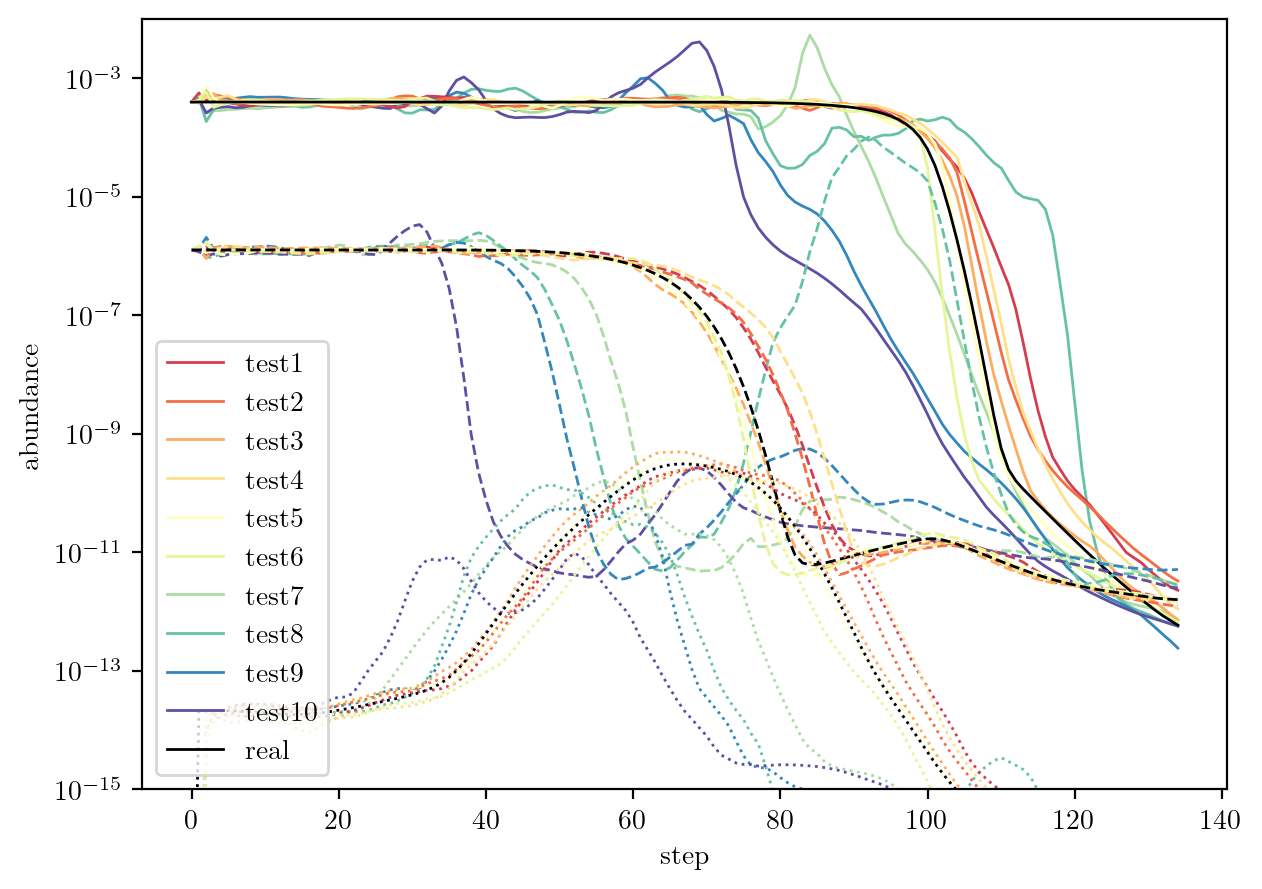

In [62]:


specs = [71, 36, 149]
ls = ['-', '--', ':']
lw = 1

# Select a colormap
cmap = plt.cm.Spectral

# Generate colors from the colormap
colors = [cmap(i) for i in np.linspace(0, 1, len(tests)+1)]

fig, ax1 = plt.subplots(1,1,figsize=(7, 5))

l_test1 = mlines.Line2D([],[], color = colors[1], ls = '-', label='test1',lw = lw)
l_test2 = mlines.Line2D([],[], color = colors[2], ls = '-', label='test2',lw = lw)
l_test3 = mlines.Line2D([],[], color = colors[3], ls = '-', label='test3',lw = lw)
l_test4 = mlines.Line2D([],[], color = colors[4], ls = '-', label='test4',lw = lw)
l_test5 = mlines.Line2D([],[], color = colors[5], ls = '-', label='test5',lw = lw)
l_test6 = mlines.Line2D([],[], color = colors[6], ls = '-', label='test6',lw = lw)
l_test7 = mlines.Line2D([],[], color = colors[7], ls = '-', label='test7',lw = lw)
l_test8 = mlines.Line2D([],[], color = colors[8], ls = '-', label='test8',lw = lw)
l_test9 = mlines.Line2D([],[], color = colors[9], ls = '-', label='test9',lw = lw)
l_test10 = mlines.Line2D([],[], color = colors[10], ls = '-', label='test10',lw = lw)
l_real = mlines.Line2D([],[], color = 'k', ls = '-', label='real',lw = lw)

# handles = [l_test1, l_test2, l_test3, l_test4, l_test5, l_test6, l_real]
handles = [l_test1, l_test2, l_test3, l_test4, l_test5, l_test6, l_test7, l_test8, l_test9, l_test10, l_real]
        

for k,i in enumerate(specs):

    ax1.plot(n_evol7[:,i], linestyle = ls[k], color = colors[7],lw = lw)
    ax1.plot(n_evol8[:,i], linestyle = ls[k], color = colors[8],lw = lw)
    ax1.plot(n_evol9[:,i],  linestyle = ls[k], color = colors[9],lw = lw)
    ax1.plot(n_evol10[:,i],  linestyle = ls[k], color = colors[10],lw = lw)

    ax1.plot(n_evol1[:,i], linestyle = ls[k], color = colors[1],lw = lw)
    ax1.plot(n_evol2[:,i], linestyle = ls[k], color = colors[2],lw = lw)
    ax1.plot(n_evol3[:,i],linestyle = ls[k], color = colors[3],lw = lw)
    ax1.plot(n_evol4[:,i], linestyle = ls[k], color = colors[4],lw = lw)
    ax1.plot(n_evol5[:,i], linestyle = ls[k], color = colors[5],lw = lw)
    ax1.plot(n_evol6[:,i], linestyle = ls[k], color = colors[6],lw = lw)

    ax1.plot(n[:,i], 'k',  linestyle = ls[k],lw = lw)

ax1.set_xlabel('step')
ax1.set_ylabel('abundance')

ax1.set_ylim(1e-15, 1e-2)

ax1.legend(handles = handles, loc = 'lower left')
ax1.set_yscale('log')
plt.show()